## DAT405 Introduction to Data Science and AI
# Assignment 2: Regression and classification

Student name | Hours spent on the tasks
------------ | -------------
Lenia Malki | 6
Maële Belmont | 6



## Setup
Python modules need to be loaded to solve the tasks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from PIL import Image
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Task 1
#### The following [web page](https://www.hemnet.se/salda/bostader?location_ids%5B%5D=940808&item_types%5B%5D=villa&sold_age=6m) lists the selling prices of villas in Landvetter that were sold in the past 6 months. Find a linear regression model that relates the living area to the selling price. (You may transcribe the values from the web page into your program or into a data file by hand, or you can write a program to do this, but don’t spend too much time doing this because “web scraping” is not the main objective of this assignment!)

In [20]:
# Read dataframe
rawData = pd.read_csv('living-area-vs-selling-price.csv')

# Create dataframe without rows containing NaN values
finalData = rawData.dropna()

# Print figure number
print('Figure 1:')

#Create Plotly figure
#Ordinary Least Squares regression trendline 
fig = px.scatter(finalData, x='Living area (m2)', 
            y='Price (kr)', hover_data=['Adress'],
            title='Price vs. living area in Landvetter', 
            trendline='ols', trendline_scope='overall', trendline_color_override='black')
#Display figure
fig.show()

Figure 1:


#### i. What are the values of the slope and intercept of the regression line?

In [4]:
LRmodel = LinearRegression().fit(finalData[['Living area (m2)']], finalData['Price (kr)'])
slope = LRmodel.coef_
intercept = LRmodel.intercept_
print('Slope: %f \nIntercept: %f \n' %(slope, intercept))

Slope: 22477.806920 
Intercept: 2394868.386459 



#### ii. Use this model to predict the selling prices of houses which have living area $100 m^{2}$, $150 m^{2}$ and $200 m^{2}$. 

In [21]:
# Create a dictonary with the living areas
livingAreaDict = {'Living area (m2)': [100, 150, 200]}

# Create a dataframe of the dictonary
livingArea = pd.DataFrame(livingAreaDict)

# Create 'Price (kr)' column based on the regression line
livingArea['Price (kr)'] = slope*livingArea['Living area (m2)'] + intercept

# Display livingArea dataframe
print('Figure 2: dataframe with predicted selling price (kr) as a function of the living area (m2)')
display(livingArea)

Figure 2: dataframe with predicted selling price (kr) as a function of the living area (m2)


,Living area (m2),Price (kr)
0,100,4.642649e+06
1,150,5.766539e+06
2,200,6.890430e+06


#### iii. Draw a residual plot

Figure 3: 


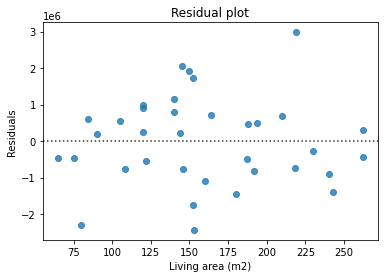

In [22]:
#Create residual plot using Seaborn
sns.residplot(data = finalData ,x = 'Living area (m2)', y = 'Price (kr)').set(title='Residual plot')

# Print figure number
print('Figure 3: ')
# Change y label
plt.ylabel('Residuals')
# Display the plot
plt.show()

#### iv. Discuss the results, and how the model could be improved.

Based on figure 4, it is evident that the residuals are balanced though there is a high variance. This somewhat random pattern of the residuals suggest that a linear model would be a more appropriate fit than a non-linear one. From figure 2, we can see that there is a potential positive relationship between living area and price. With the help of a correlation analysis, we can measure the strength of the linear relationship between the two. A correlation value of approximately 0.708 indicates that there is a rather strong positive linear relationship between the two variables.

In [8]:
# Correlation between living area and price
finalData['Living area (m2)'].corr(finalData['Price (kr)']) 

0.7082424189866006

## Task 2
#### Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set. Use the one-vs-rest option to use the same setup as in the lectures for multiclass regression.

The quality of the logistic regression model can be evaluated using a confusion matrix as presented in figure 2. The accuracy score is very close to 1, indicating that the performance of our classifier is quite strong. The only label which seems to have been misclassified is versicolor to virginica but this only happened once.

In [9]:
#Load dataset
iris = datasets.load_iris()

# Split dataset into training set (70%) and test set (30%)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

In [10]:
def LOG(X_train, X_test, y_train, y_test, matrix): 
    #Create Logistic Classifier
    #### default value: max_iter = 100 but warning appeared 'lbfgs failed to converge' so we increased max_iter
    logReg = LogisticRegression(multi_class='ovr', solver='liblinear') 

    #Train the model using the training sets
    logReg.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = logReg.predict(X_test)
    
    if matrix == 'No':
        print('---------------------------------------------------------------------------------------------------------------------')
        print('LOGISTIC CLASSIFIER')

        # Model Accuracy, how often is the classifier correct?
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    
    if matrix == 'Yes':
        print('---------------------------------------------------------------------------------------------------------------------')
        print('LOGISTIC CLASSIFIER - Confusion matrix:')
        # Confusion matrix
        confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
        score = metrics.accuracy_score(y_test, y_pred)
        
        plt.figure(figsize=(4,4))
        sns.heatmap(confusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
        plt.ylabel('Actual label');
        plt.xticks(ticks=[0.5,1.5,2.5], labels=iris.target_names)
        plt.yticks(ticks=[0.5,1.5,2.5], labels=iris.target_names)
        plt.xlabel('Predicted label');
        all_sample_title = 'Accuracy Score: {0}'.format(score)
        plt.title(all_sample_title, size = 9);

        plt.show()


---------------------------------------------------------------------------------------------------------------------
LOGISTIC CLASSIFIER
Accuracy: 0.8888888888888888
---------------------------------------------------------------------------------------------------------------------
LOGISTIC CLASSIFIER - Confusion matrix:


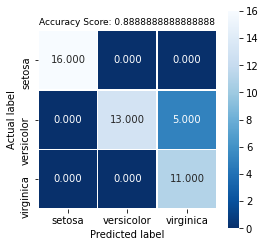

In [11]:
LOG(X_train, X_test, y_train, y_test, 'No')
LOG(X_train, X_test, y_train, y_test, 'Yes')

## Task 3
#### Use k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger  for the different cases? Why?

> **uniform** : uniform weights. All points in each neighborhood are weighted equally.

> **distance** : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

With an increasing k-value for uniform weights, it is evident that the accuracy decreases. Having all neighbours weighted equally can lead to problems. For example, it might be the case that specific data point is in fact much closer to some neigbours however, due to a high concentration of other neighbours whitin the specified scope, this data point will instead be wrongly classified likewise. We can especiially see this happen for k=105, which takes the entire sample set into consideration. It is however worth noting that a higher k-value does not always imply less accuracy. Furthermore, it may be computionally expensive to use too high k-values. In this case, a k-value of 1 and 105 for distance-based weights generates the same accuracy level.       

In [12]:
def KNN(X_train, X_test, y_train, y_test, k, weights, dataset, matrix):
    '''
    k (int): 
    weights (string):
    dataset (dataset):
    matrix (string): ye
    '''
    #Create KNN Classifier
    knn= KNeighborsClassifier(n_neighbors=k, weights=weights) 

    #Train the model using the training sets
    knn.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(X_test)
    
    if matrix == 'No':
        usefulValues = [k, weights, metrics.accuracy_score(y_test, y_pred)]
    
        return usefulValues
    
    if matrix == 'Yes':
        print('---------------------------------------------------------------------------------------------------------------------')
        print('KNN CLASSIFIER - k: %f, weights: %s - Confusion matrix:' %(k, weights))
        # Confusion matrix
        confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
        score = metrics.accuracy_score(y_test, y_pred)
        
        plt.figure(figsize=(4,4))
        sns.heatmap(confusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
        plt.ylabel('Actual label');
        plt.xticks(ticks=[0.5,1.5,2.5], labels=iris.target_names)
        plt.yticks(ticks=[0.5,1.5,2.5], labels=iris.target_names)
        plt.xlabel('Predicted label');
        all_sample_title = 'Accuracy Score: {0}'.format(score)
        plt.title(all_sample_title, size = 9);

        plt.show()

    
    

In [23]:
# Store [k, weights, metrics.accuracy_score(y_test, y_pred)] in a list
U1 = KNN(X_train, X_test, y_train, y_test, 1, 'uniform', iris, 'No')
U40 = KNN(X_train, X_test, y_train, y_test, 40, 'uniform', iris, 'No')
U105 = KNN(X_train, X_test, y_train, y_test, 105, 'uniform', iris, 'No')

D1 = KNN(X_train, X_test, y_train, y_test, 1, 'distance', iris, 'No')
D40 = KNN(X_train, X_test, y_train, y_test, 40, 'distance', iris, 'No')
D105 = KNN(X_train, X_test, y_train, y_test, 105, 'distance', iris, 'No')

# Create a dictionnary with k, weights, accuracy
comparisonDict = {'k':[U1[0], U40[0], U105[0], D1[0], D40[0], D105[0]],
        'Weights':[U1[1], U40[1], U105[1], D1[1], D40[1], D105[1]], 
        'Accuracy':[U1[2], U40[2], U105[2], D1[2], D40[2], D105[2]]}

# Create a dataframe with the information in the dictionnary
comparisonDF = pd.DataFrame(comparisonDict)
 
# Display the dataframe with k, weights and accuracy 
print('Figure 4:')
display(comparisonDF)

Figure 4:


,k,Weights,Accuracy
0,1,uniform,0.977778
1,40,uniform,0.888889
2,105,uniform,0.244444
3,1,distance,0.977778
4,40,distance,0.977778
5,105,distance,0.977778


## Task 4
#### Compare the classification models for the iris data set that are generated by k-nearest neighbours (for the different settings from question 3) and by logistic regression. Calculate confusion matrices for these models and discuss the performance of the various models. 

The KNN-classifier with distance based weights results in the highest accuracy as opposed to the KNN-classifier with uniform based weights and the logistic classifier. We can also see that the 40NN-classifier with uniform weights has the same accuracy as the logistic classifier. They both miss classify the versicolor specie however, the 40NN-classifier also misclassified virginica. It is clear that using the euclidean distance when classifying generates a better accuracy. However, one drawback to mention regarding KNN-classifiers is that the K-value has to be chosen carefully in order to yield a high accuracy.

### Classification models comparison 

In [14]:
print('---------------------------------------------------------------------------------------------------------------------')
print('KNN CLASSIFIER')
display(comparisonDF)
LOG(X_train, X_test, y_train, y_test, 'No')

---------------------------------------------------------------------------------------------------------------------
KNN CLASSIFIER


,k,Weights,Accuracy
0,1,uniform,0.977778
1,40,uniform,0.888889
2,105,uniform,0.244444
3,1,distance,0.977778
4,40,distance,0.977778
5,105,distance,0.977778


---------------------------------------------------------------------------------------------------------------------
LOGISTIC CLASSIFIER
Accuracy: 0.8888888888888888


### Confusion Matrices
**k-nearest neighbours regression with uniform-based weight**

---------------------------------------------------------------------------------------------------------------------
KNN CLASSIFIER - k: 1.000000, weights: uniform - Confusion matrix:


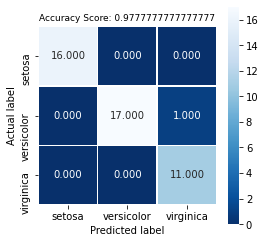

---------------------------------------------------------------------------------------------------------------------
KNN CLASSIFIER - k: 40.000000, weights: uniform - Confusion matrix:


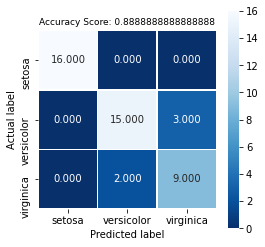

---------------------------------------------------------------------------------------------------------------------
KNN CLASSIFIER - k: 105.000000, weights: uniform - Confusion matrix:


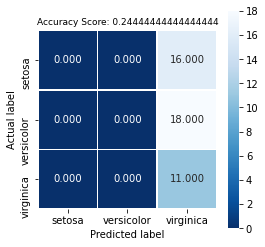

In [15]:
KNN(X_train, X_test, y_train, y_test, 1, 'uniform', iris, 'Yes')
KNN(X_train, X_test, y_train, y_test, 40, 'uniform', iris, 'Yes')
U105 = KNN(X_train, X_test, y_train, y_test, 105, 'uniform', iris, 'Yes')

**k-nearest neighbours regression with distance-based weight**

---------------------------------------------------------------------------------------------------------------------
KNN CLASSIFIER - k: 1.000000, weights: distance - Confusion matrix:


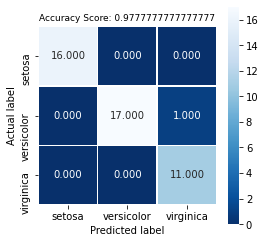

---------------------------------------------------------------------------------------------------------------------
KNN CLASSIFIER - k: 40.000000, weights: distance - Confusion matrix:


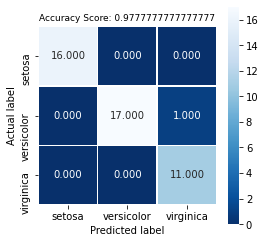

---------------------------------------------------------------------------------------------------------------------
KNN CLASSIFIER - k: 105.000000, weights: distance - Confusion matrix:


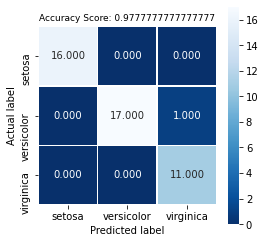

In [16]:
KNN(X_train, X_test, y_train, y_test, 1, 'distance', iris, 'Yes')
KNN(X_train, X_test, y_train, y_test, 40, 'distance', iris, 'Yes')
KNN(X_train, X_test, y_train, y_test, 105, 'distance', iris, 'Yes')

**Logistic regression**

---------------------------------------------------------------------------------------------------------------------
LOGISTIC CLASSIFIER - Confusion matrix:


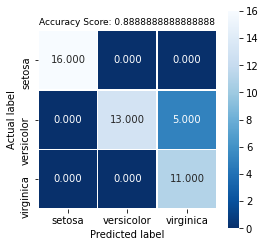

In [17]:
LOG(X_train, X_test, y_train, y_test, 'Yes')

## Task 5
#### Explain why it is important to use a separate test (and sometimes validation) set.